# Ultimate Technologies Inc. Take-Home Challenge

## Part 1 ‑ Exploratory data analysis

#### The attached `logins.json` file contains (simulated) timestamps of user logins in a particular geographic location. 

1. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 
2. Please report/illustrate important features of the demand, such as daily cycles. 
3. If there are data quality issues, please report them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
login_times = pd.read_json('logins.json')

In [3]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_times.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


**Our data set is not having null values and the datatype is `datetime64[ns]`**

We will set the `login_time` column as our index & then we will aggregate the count based on 15 minute interval

In [6]:
login_times.set_index('login_time', inplace=True)

In [7]:
login_times.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


Lets add a column for count and initialize it with 1

In [8]:
login_times['count'] = 1
login_times.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [9]:
login_times.sort_index(inplace=True)
login_times_15min_agg = login_times.resample("15min").sum()
login_times_15min_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
login_times_15min_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


Our time series data starts at `1970-01-01 20:00:00` and ends at `1970-04-13 18:45:00`

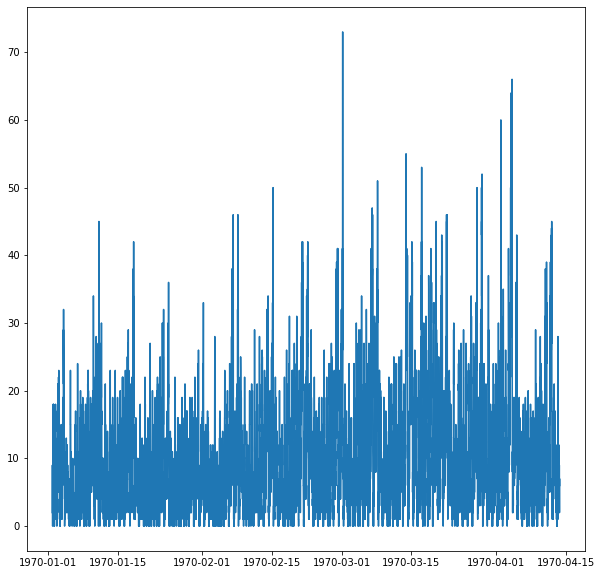

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(login_times_15min_agg)
plt.show()

The demand looks to be changing periodicaly but the grpah is not clearly indicating the period. Lets look at the data with a window of a day.

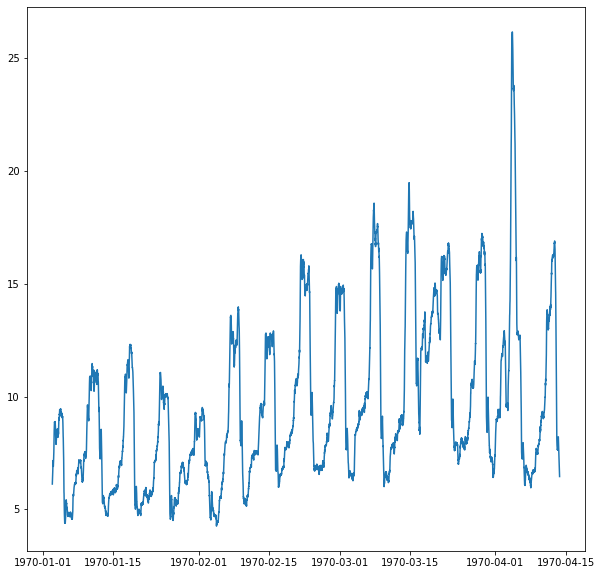

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(login_times_15min_agg.rolling(window=24*4).mean())
plt.show()

Based on the above plot the demand seems to varying at a weekly basis and the demand seems to be rising over the weekend. Lets take a month and try to see how the demand varies.Let's take `Feb 1970` for our observation.

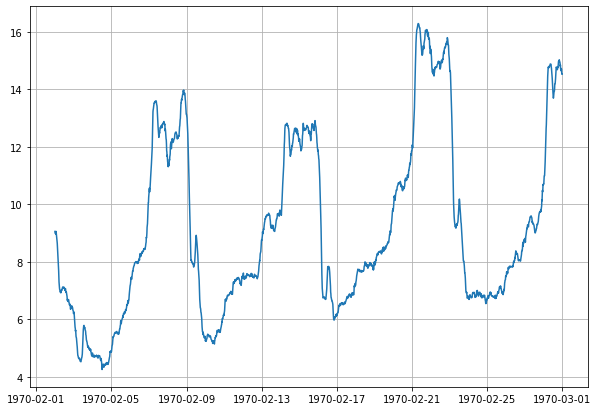

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(login_times_15min_agg.loc['1970-02'].rolling(window=24*4).mean())
plt.grid()
plt.show()

So demand clearly rises on the weekends but there is decline in demand on the weekend as well. Let's get more granular to find out.

In [14]:
import calendar
calendar.day_name[datetime.datetime.strptime('01-02-1970', '%d-%m-%Y').weekday()]

'Sunday'

Since the first day of Feb 1970 was a Sunday, let's take a look at the first week of Feb 1970

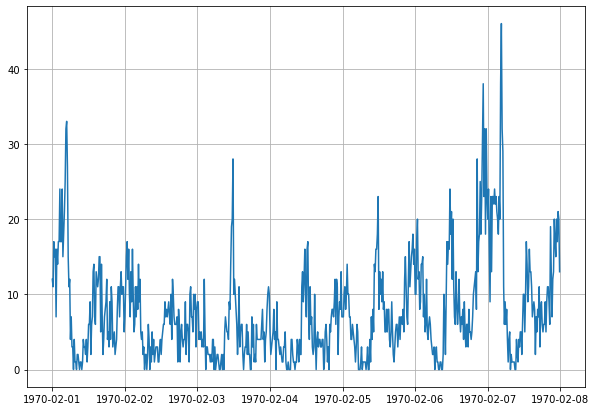

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(login_times_15min_agg.loc['1970-02-01':'1970-02-07'])
plt.grid()
plt.show()

The demand clearly seems to be rising on the weekends. Lets smoothen the data for 12 hr rolling window and compare the data.

In [16]:
feb_w1 = login_times_15min_agg['count']['1970-02-01':'1970-02-07']
feb_w1.head()

login_time
1970-02-01 00:00:00    12
1970-02-01 00:15:00    11
1970-02-01 00:30:00    17
1970-02-01 00:45:00    15
1970-02-01 01:00:00    16
Freq: 15T, Name: count, dtype: int64

<AxesSubplot:xlabel='login_time'>

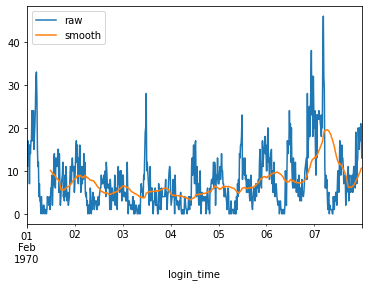

In [17]:
feb_w1_smooth = feb_w1.rolling(window=48).mean()
feb_w1_com = pd.DataFrame({'raw':feb_w1, 'smooth':feb_w1_smooth})
feb_w1_com.plot()

Lets explore the time when the demand surges over weekends. For this we will take Feb 6 to Feb 8

In [18]:
calendar.day_name[datetime.datetime.strptime('06-02-1970', '%d-%m-%Y').weekday()]

'Friday'

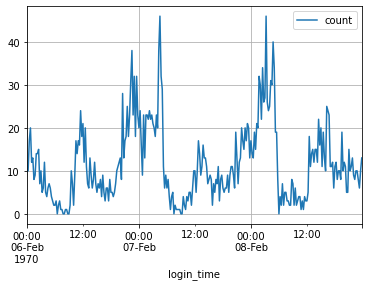

In [19]:
login_times_15min_agg.loc['1970-02-06':'1970-02-08'].plot()
plt.grid()
plt.show()

Based on the observation above, the demands seem to be rising around midnight and noon over the weekends. Now lets take a look over the weekdays.

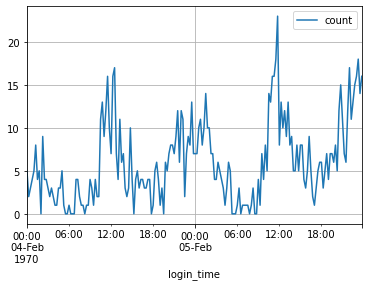

In [20]:
login_times_15min_agg.loc['1970-02-04':'1970-02-05'].plot()
plt.grid()
plt.show()

Lets take a pair of weekdays from March to come to conclusion.

In [21]:
calendar.day_name[datetime.datetime.strptime('01-03-1970', '%d-%m-%Y').weekday()]

'Sunday'

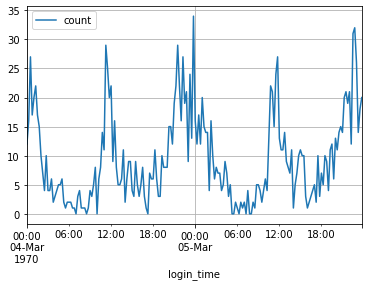

In [22]:
login_times_15min_agg.loc['1970-03-04':'1970-03-05'].plot()
plt.grid()
plt.show()

Over weekdays too, the demands are higher at noon and midnight.

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    * **Ans:** The key measure of success would be a significant increase in the driver partners crossing over the toll bridge to another city after the incentives are given and that leads to an increased revenue for the Ultimate Inc.
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
        * **Ans:** Before implementing the change to reimburse the toll fee to the driver partners, we should look at the data of how manuy crossing happens without the incentive. We would then need to see how this changes when the drivers are incentivised.
    2. what statistical test(s) you will conduct to verify the significance of the observation
        * **Ans:** H<sub>0</sub>: There is no change in the number of crossing over to another city with or without incentive  H<sub>1</sub>: There is a significant increase in the number of crossing over to another city with incentive
    3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
        * **Ans:** If we saw that there has been a significant change in proportion of crossing the bridge to the city with greater demand from the city with less demand in a given period was large, then we would know that paying the drivers’ toll fee was an effective intervention, at least in terms of meeting demand quicker. If we saw that this percentage change was small, then we would know that the proposed change was not effective, and we would need to provide additional incentives to drivers to cross the bridge. Before coming to any conclusion for a robust recommendation, we would need to look at the real data.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file `ultimate_data_challenge.json`. 

See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

### Data description
* **city**: city this user signed up in
* **phone**: primary device for this user
* **signup_date**: date of account registration; in the form ‘YYYY MM DD’
* **last_trip_date**: the last time this user completed a trip; in the form ‘YYYY MM DD’
* **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
* **avg_rating_by_driver**: the rider’s average rating over all of their trips
* **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
* **surge_pct**: the percent of trips taken with surge multiplier > 1
* **avg_surge**: The average surge multiplier over all of this user’s trips
* **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up
* **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* **weekday_pct**: the percent of the user’s trips occurring during a weekday

In [23]:
df = pd.read_json('ultimate_data_challenge.json')

In [24]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [26]:
df.shape

(50000, 12)

In [27]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


lets transform the date columns to datetime

In [28]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [30]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

We are assuming the current date as '2014-07-01 00:00:00' so the 30 days period for retention would start at '2014-06-01 00:00:00'. Lets add a column called active.

In [31]:
df['active'] = (df.last_trip_date >= '2014-06-01')*1

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int32 

In [33]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


In [34]:
print('fraction of users who retained : ', df.active.sum()/df.active.count())

fraction of users who retained :  0.37608


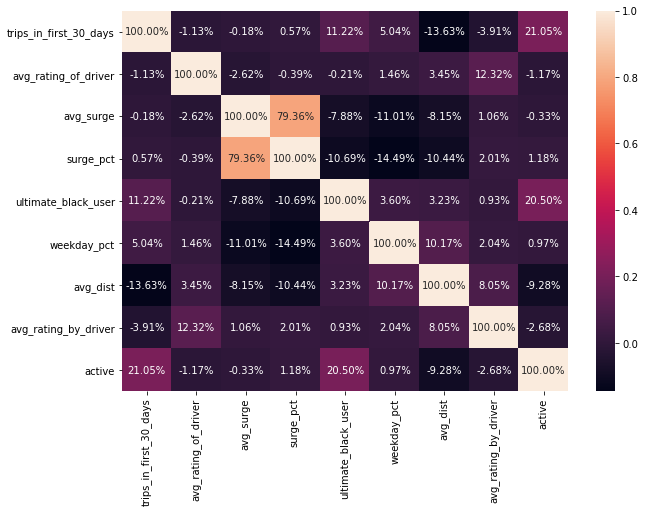

In [35]:
plt.figure(figsize=(10, 7))
corr = df.corr()
ax = sns.heatmap(corr, annot=True, fmt=".2%")
plt.show()

In [36]:
corr['active'].sort_values(ascending=False)

active                    1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: active, dtype: float64

So our target variable active is somewhat correlated to trips_in_first_30_days and ultimate_black_user and not much correlated to other numeric features. Now lets take a look at non numeric features.

In [37]:
df.nunique()

city                         3
trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        37
avg_surge                  115
last_trip_date             182
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        27
active                       2
dtype: int64

Our non numeric features `city` and `phone` have limited unique values. Lets take value counts in these columns

In [38]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [39]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [40]:
df.city.isna().value_counts()

False    50000
Name: city, dtype: int64

In [41]:
df.phone.isna().value_counts()

False    49604
True       396
Name: phone, dtype: int64

In [42]:
df.phone.fillna('Other', inplace=True)

In [43]:
df.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

Both of our columns have 3 unique values now, Lets one hot encode them to make those features numerical.

In [44]:
cities_dummy = pd.get_dummies(df['city'])
phones_dummy = pd.get_dummies(df['phone'])
df = df.join(cities_dummy).join(phones_dummy)

In [45]:
df.drop(['city', 'phone'], axis=1, inplace=True)

In [46]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Most of our users are from Winterfell(46.67%) and most of our users use iPhone(69.16%). Lets take a look at the correlation again.

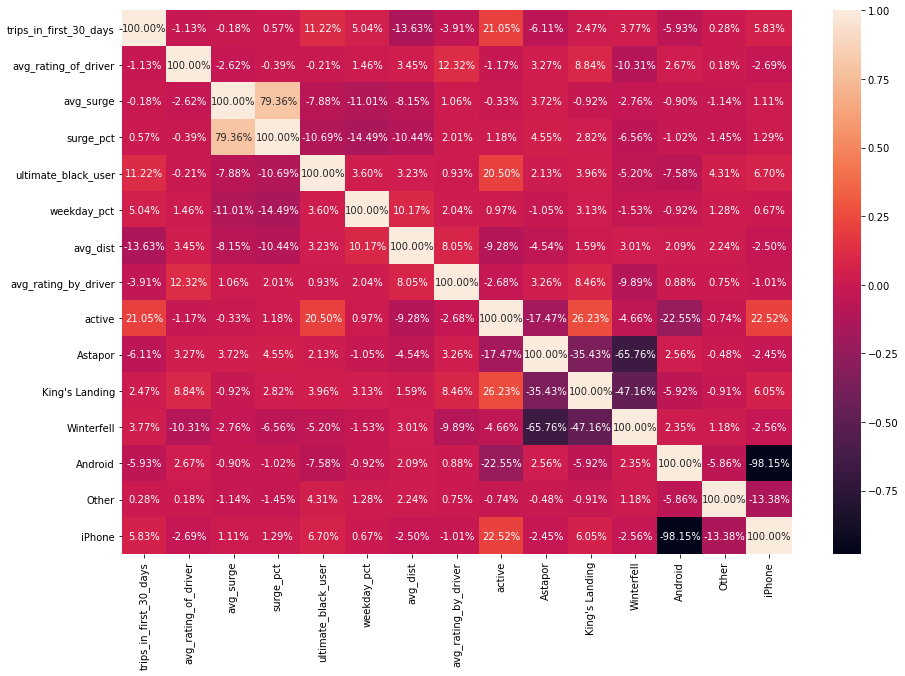

In [47]:
plt.figure(figsize=(15, 10))
corr = df.corr()
ax = sns.heatmap(corr, annot=True, fmt=".2%")
plt.show()

In [48]:
corr['active'].sort_values(ascending=False)

active                    1.000000
King's Landing            0.262284
iPhone                    0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
Other                    -0.007419
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
Winterfell               -0.046611
avg_dist                 -0.092780
Astapor                  -0.174655
Android                  -0.225464
Name: active, dtype: float64

Being from King's Landing is positively correlated to being active while being from Winterfell or Astapor is negatively correlated to being active.\
\
Using an iPhone is positively associated to being active while Android users are negatively associated.\
\
Now lets take a look at our two date columns

In [49]:
df.signup_date.describe()

C:\Users\Prakash\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

In [50]:
df.last_trip_date.describe()

C:\Users\Prakash\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

Since column `active` has been formed using the last_trip_date, the two shhould be hilghly correlated, hence We will drop the column last_trip_date.

In [51]:
df1 = df.drop(['last_trip_date'], axis=1)

In [52]:
df1.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,4,2014-01-25,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0,0


lets transform our `signup_date` column into difference between current date('2014-07-01') to transform it into a numeric column.

In [53]:
ref = max(df['last_trip_date'])
df1['signup_date'] = (ref - df1['signup_date']).dt.days + 1

In [54]:
df1.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,50000.00000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,166.45532,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,3.792684,8.75422,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,152.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,159.00000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,166.00000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,174.00000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,125.000000,182.00000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   signup_date             50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   surge_pct               50000 non-null  float64
 5   ultimate_black_user     50000 non-null  bool   
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    49799 non-null  float64
 9   active                  50000 non-null  int32  
 10  Astapor                 50000 non-null  uint8  
 11  King's Landing          50000 non-null  uint8  
 12  Winterfell              50000 non-null  uint8  
 13  Android                 50000 non-null  uint8  
 14  Other                   50000 non-null

Now lets tranform our bool column `ultimate_black_user` into a numeric one ;\
True =1
False =0

In [56]:
df1['ultimate_black_user'] = df1['ultimate_black_user'].astype(int)
df1['ultimate_black_user'].describe()

count    50000.00000
mean         0.37708
std          0.48466
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: ultimate_black_user, dtype: float64

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   signup_date             50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   surge_pct               50000 non-null  float64
 5   ultimate_black_user     50000 non-null  int32  
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    49799 non-null  float64
 9   active                  50000 non-null  int32  
 10  Astapor                 50000 non-null  uint8  
 11  King's Landing          50000 non-null  uint8  
 12  Winterfell              50000 non-null  uint8  
 13  Android                 50000 non-null  uint8  
 14  Other                   50000 non-null

Lets impute the missing rating columns with mean ratings of their respective columns

In [65]:
df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].mean(), inplace=True)
df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].mean(), inplace=True)

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   signup_date             50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   surge_pct               50000 non-null  float64
 5   ultimate_black_user     50000 non-null  int32  
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    50000 non-null  float64
 9   active                  50000 non-null  int32  
 10  Astapor                 50000 non-null  uint8  
 11  King's Landing          50000 non-null  uint8  
 12  Winterfell              50000 non-null  uint8  
 13  Android                 50000 non-null  uint8  
 14  Other                   50000 non-null

lets run correlation test again

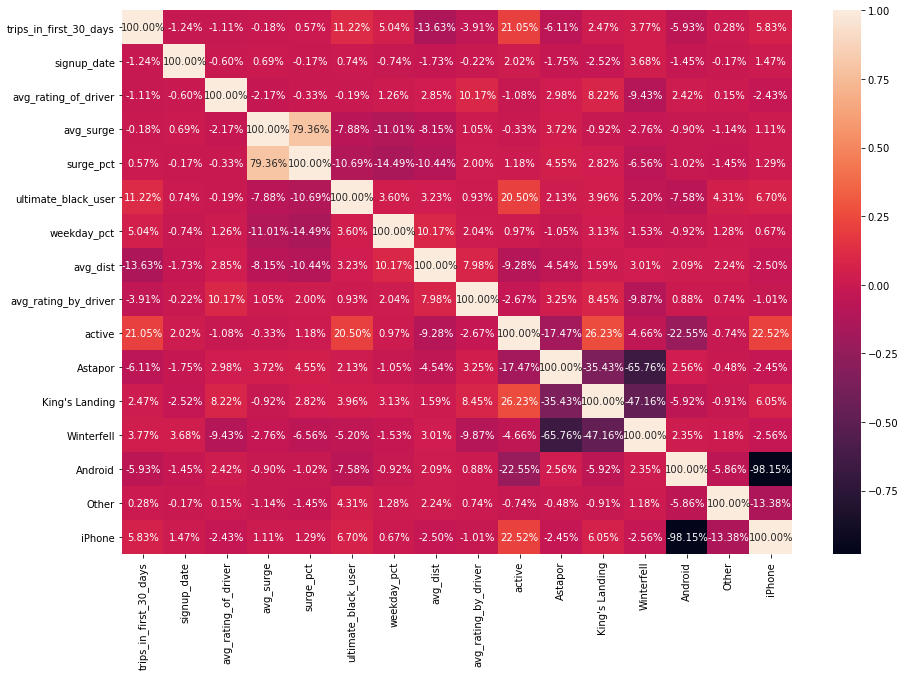

In [67]:
plt.figure(figsize=(15, 10))
corr1 = df1.corr()
ax = sns.heatmap(corr1, annot=True, fmt=".2%")
plt.show()

In [68]:
corr1['active'].sort_values(ascending=False)

active                    1.000000
King's Landing            0.262284
iPhone                    0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
signup_date               0.020211
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
Other                    -0.007419
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
Winterfell               -0.046611
avg_dist                 -0.092780
Astapor                  -0.174655
Android                  -0.225464
Name: active, dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve

In [70]:
# Split Data into Training and Test Sets
X = df1.drop(['active'], axis=1)
y = df1['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### 1. Lets start with Logistic Regression

In [72]:
param_grid_lr = dict(solver=['liblinear'],penalty=['l1', 'l2'],C=np.logspace(-5, 8, 15))
classifier_lr = LogisticRegression()
grid_search = GridSearchCV(estimator=classifier_lr, param_grid=param_grid_lr, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.720257 using {'C': 3.727593720314938, 'penalty': 'l1', 'solver': 'liblinear'}


In [77]:
classifier_lr = grid_result.best_estimator_
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)
y_pred_prob = classifier_lr.predict_proba(X_test)[:,1]
print("Accuracy: %f " % accuracy_score(y_pred=y_pred, y_true=y_test))
print("precision: %f " % precision_score(y_pred=y_pred, y_true=y_test))
print("recall: %f " % recall_score(y_pred=y_pred, y_true=y_test))
print("AUC: %f " % roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.713933 
precision: 0.659424 
recall: 0.494948 
AUC: 0.756267 


##### 2. KNeighborsClassifier

In [78]:
classifier_knn = KNeighborsClassifier()
param_grid_knn =dict(n_neighbors=np.arange(1,20),weights=['uniform', 'distance'],metric=['euclidean', 'manhattan', 'minkowski'])
grid_search = GridSearchCV(estimator=classifier_knn, param_grid=param_grid_knn, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
classifier = grid_result.best_estimator_
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)[:,1]
print("Accuracy: %f " % accuracy_score(y_pred=y_pred, y_true=y_test))
print("precision: %f " % precision_score(y_pred=y_pred, y_true=y_test))
print("recall: %f " % recall_score(y_pred=y_pred, y_true=y_test))
print("AUC: %f " % roc_auc_score(y_test, y_pred_prob))

Best: 0.752200 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Accuracy: 0.751667 
precision: 0.699334 
recall: 0.595816 
AUC: 0.811263 


##### 3. DecisionTreeClassifier

In [83]:
classifier_dt = DecisionTreeClassifier()
param_grid_dt = dict(max_depth= [3, 10, 20, None], max_features=np.arange(1, 9),min_samples_leaf= np.arange(1, 9),min_samples_split= np.arange(2, 9),criterion= ["gini", "entropy"])
grid_search = GridSearchCV(estimator=classifier_dt, param_grid=param_grid_dt, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
classifier = grid_result.best_estimator_
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)[:,1]
print("Accuracy: %f " % accuracy_score(y_pred=y_pred, y_true=y_test))
print("precision: %f " % precision_score(y_pred=y_pred, y_true=y_test))
print("recall: %f " % recall_score(y_pred=y_pred, y_true=y_test))
print("AUC: %f " % roc_auc_score(y_test, y_pred_prob))

Best: 0.772114 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 7}
Accuracy: 0.765200 
precision: 0.711773 
recall: 0.631271 
AUC: 0.816668 


In [ ]:
classifier_rf = RandomForestClassifier(random_state=0)
param_grid_rf = dict(n_estimators= [50, 100], criterion= ["gini", "entropy"],max_depth= [3, 10, 20, None],min_samples_leaf= 1, min_samples_split= 7, max_features= 7)
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=param_grid_dt, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
classifier = grid_result.best_estimator_
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)[:,1]
print("Accuracy: %f " % accuracy_score(y_pred=y_pred, y_true=y_test))
print("precision: %f " % precision_score(y_pred=y_pred, y_true=y_test))
print("recall: %f " % recall_score(y_pred=y_pred, y_true=y_test))
print("AUC: %f " % roc_auc_score(y_test, y_pred_prob))